In [24]:
import numpy as np
import pandas as pd
D = np.array([[4,10], [5,11], [10,8], [3,8], [6,8], [9,5], [8,3], [13,8], [1,7], [2,7], [6,7], [8,7], [12,8], [13,7], [8,6], [14,6], [6,3], [7,5], [10,4], [4,3], [3,6], [9,2], [11,3], [15,4], [13,3], [13,2]])

In [3]:
res = np.array([])
for i in D:
  for j in D:
    # if i[0] != j[0] or i[1] != j[1]:
      res = np.append(res,[i,j,np.sqrt((i[0]-j[0])**2 +(i[1]-j[1])**2)],axis = 0)
print(res)

[array([ 4, 10]) array([ 4, 10]) 0.0 ... array([13,  2]) array([13,  2])
 0.0]


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [4]:
res

array([array([ 4, 10]), array([ 4, 10]), 0.0, ..., array([13,  2]),
       array([13,  2]), 0.0], dtype=object)

In [5]:

#df = pd.DataFrame(D, columns=['i', 'j'], index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'])
df = pd.DataFrame(D, columns=['i', 'j'])

In [6]:
df.head()

,i,j
0,4,10
1,5,11
2,10,8
3,3,8
4,6,8


In [25]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 2, min_samples = 3)
model = dbscan.fit(df)
model.labels_

array([-1, -1,  3,  0,  1,  1,  2,  3,  0,  0,  1,  1,  3,  3,  1,  3,  2,
        1,  1,  2,  0,  2,  1, -1,  1,  1])

In [11]:
# Finding core points by model object sklearn
print(model.core_sample_indices_)
df.iloc[model.core_sample_indices_]

[ 3  5  6  7  9 10 11 12 13 14 16 17 18 20 22 24]


,i,j
3,3,8
5,9,5
6,8,3
7,13,8
9,2,7
10,6,7
11,8,7
12,12,8
13,13,7
14,8,6


In [12]:
df['cluster'] = model.labels_
df

,i,j,cluster
0,4,10,-1
1,5,11,-1
2,10,8,3
3,3,8,0
4,6,8,1
5,9,5,1
6,8,3,2
7,13,8,3
8,1,7,0
9,2,7,0


In [27]:
core_points = df.iloc[model.core_sample_indices_]
print("---------------------------------------------")
print("Core points")
print(core_points)
noise_points = df[df.cluster == -1]
print("---------------------------------------------")
print("Noise points")
print(noise_points)
A = set([x for x in df.index])
B = set(model.core_sample_indices_).union({x for x in list(noise_points.index)})
border_points = A.difference(B)  
print("---------------------------------------------")
print("Border points")
#print(border_points)
for i in border_points:
  print(df.iloc[i])

---------------------------------------------
Core points
     i  j  cluster
3    3  8        0
5    9  5        1
6    8  3        2
7   13  8        3
9    2  7        0
10   6  7        1
11   8  7        1
12  12  8        3
13  13  7        3
14   8  6        1
16   6  3        2
17   7  5        1
18  10  4        1
20   3  6        0
22  11  3        1
24  13  3        1
---------------------------------------------
Noise points
     i   j  cluster
0    4  10       -1
1    5  11       -1
23  15   4       -1
---------------------------------------------
Border points
i          10
j           8
cluster     3
Name: 2, dtype: int64
i          6
j          8
cluster    1
Name: 4, dtype: int64
i          1
j          7
cluster    0
Name: 8, dtype: int64
i          14
j           6
cluster     3
Name: 15, dtype: int64
i          4
j          3
cluster    2
Name: 19, dtype: int64
i          9
j          2
cluster    2
Name: 21, dtype: int64
i          13
j           2
cluster     1
Nam

In [28]:

Npts = {x for x in list(noise_points.index)}
print(Npts)
npts1 = set(model.core_sample_indices_)
res = npts1.union(Npts)
print(res)

{0, 1, 23}
{0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 22, 23, 24}


In [15]:
model.core_sample_indices_

array([ 3,  5,  6,  7,  9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 22, 24])

In [16]:
set(model.core_sample_indices_)
set(noise_points.index)

{0, 1, 23}

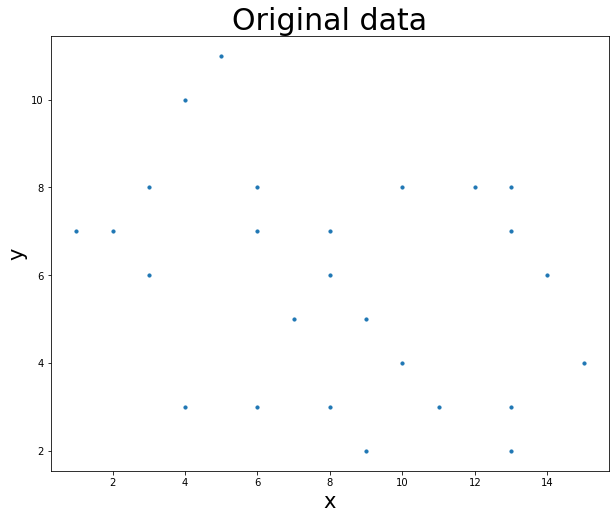

In [29]:
# Plotting the resulting clusters
import matplotlib.pyplot as plt
import matplotlib.colors

plt.figure(figsize=(10,8))
plt.scatter(df.i,df.j,s=10)
plt.title('Original data',fontsize=30)
plt.xlabel('x',fontsize=21)
plt.ylabel('y',fontsize=21)
plt.show()

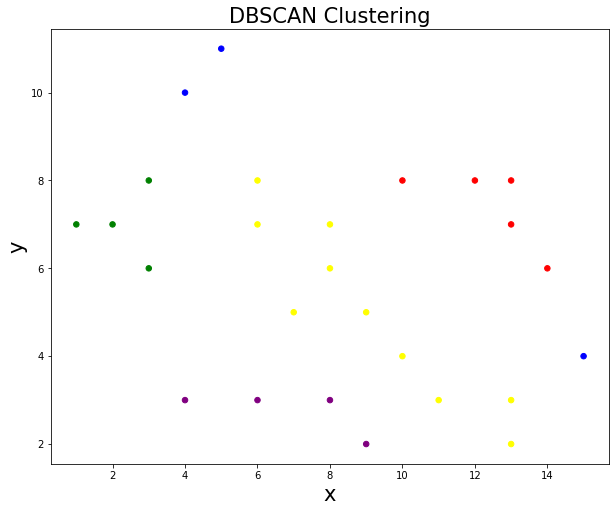

In [30]:
colors=['blue','green','yellow','purple','red']

plt.figure(figsize=(10,8))
plt.scatter(df.i,df.j,c=df['cluster'],cmap= matplotlib.colors.ListedColormap(colors),s=30)
plt.title('DBSCAN Clustering',fontsize=21)
plt.xlabel('x',fontsize=21)
plt.ylabel('y',fontsize=21)
plt.show()

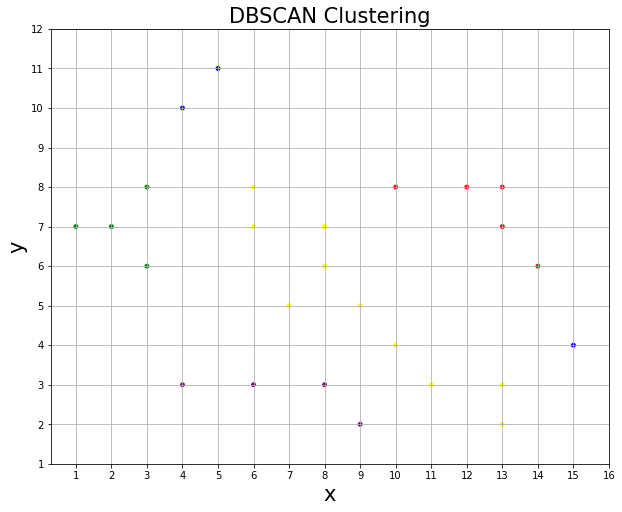

In [31]:
colors=['blue','green','yellow','purple','red']
# Usage of Grid to find the core, border and noise points
plt.figure(figsize=(10,8))
plt.scatter(df.i,df.j,c=df['cluster'],cmap= matplotlib.colors.ListedColormap(colors),s=15)
plt.grid(visible=True)
plt.xticks([x for x in range(1,17)])
plt.yticks([y for y in range(1,13)])
plt.title('DBSCAN Clustering',fontsize=21)
plt.xlabel('x',fontsize=21)
plt.ylabel('y',fontsize=21)
plt.show()

### Q4) Is k directly density reachable from e?

In [20]:
k = df.iloc[10]
e = df.iloc[4]
dist = np.sqrt((k[0]-e[0])**2 +(k[1]-e[1])**2)
eps = 2
res = 'directly density reachable' if dist < eps else 'Not directly density reachable'
print(f'Point K {k[0],k[1]} is not {res} to point e {e[0],e[1]}')

Point K (6, 7) is not directly density reachable to point e (6, 8)


In [21]:
core_points

,i,j,cluster
3,3,8,0
5,9,5,1
6,8,3,2
7,13,8,3
9,2,7,0
10,6,7,1
11,8,7,1
12,12,8,3
13,13,7,3
14,8,6,1


### Q5) Is z density reachable from r? If yes, list a possible connecting path.

- A point X is density-reachable from point Y w.r.t epsilon, minPoints if there is a chain of points p1, p2, p3, …, pn and p1=X and pn=Y such that pi+1 is directly density-reachable from pi.

In [22]:
# path
print('Path 1: Z --> Y --> W --> s --> f --> o --> r')
print('Path 2: Z --> Y --> W --> s --> f --> r')

Path 1: Z --> Y --> W --> s --> f --> o --> r
Path 2: Z --> Y --> W --> s --> f --> r
